# Average and deviation std of the models for the loss
The loss is the Mean Square Error, basicaly same stuff of Euclidean distance between two matrix

In [1]:
import os
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def extract_lastLoss(directory):
    # Extract last loss from all the models
    lastLoss_tuples = []
    # Loop through each file in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)       # Construct the full file path
        if os.path.isfile(file_path):       # Check if it is a file
            result_sim = np.load(file_path, allow_pickle=True)
            lastLoss_tuples.extend([(label, array[-1]) for label, array in result_sim if 'loss' in label])

    # Creating df
    return pd.DataFrame(lastLoss_tuples, columns=['label', 'value'])


In [3]:
def models_repmin_mean_devstd(df, name_models):
    # Extracting the base label (e.g., 'LabelA', 'LabelB')
    df['label_no_rep'] = df['label'].apply(lambda x: x.split('_rep')[0])
    # Group with the base label and find min
    min_lastLoss_s = df.groupby('label_no_rep')['value'].min()
    # print(min_lastLoss_s)

    mean_models= []
    std_dev_models =[]
    for name in name_models:
        # take the same model 
        model_s = min_lastLoss_s[min_lastLoss_s.index.str.contains(name)]
        mean_models.append(model_s.mean())
        std_dev_models.append(model_s.std())
    
    return mean_models, std_dev_models

In [4]:
def models_repmax_mean_devstd(df, name_models):
    # Extracting the base label (e.g., 'LabelA', 'LabelB')
    df['label_no_rep'] = df['label'].apply(lambda x: x.split('_rep')[0])
    # Group with the base label and find min
    max_lastLoss_s = df.groupby('label_no_rep')['value'].max()
    # print(min_lastLoss_s)

    mean_models= []
    std_dev_models =[]
    for name in name_models:
        # take the same model 
        model_s = max_lastLoss_s[max_lastLoss_s.index.str.contains(name)]
        mean_models.append(model_s.mean())
        std_dev_models.append(model_s.std())
    
    return mean_models, std_dev_models

In [5]:
def extract_all_loss(directory):
    # Extract last loss from all the models
    lastLoss_tuples = []
    # Loop through each file in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)       # Construct the full file path
        if os.path.isfile(file_path):       # Check if it is a file
            result_sim = np.load(file_path, allow_pickle=True)
            lastLoss_tuples.extend([(label, array) for label, array in result_sim if 'loss' in label])

    # Creating df
    return lastLoss_tuples

[1.30109155e-01 1.29848105e-01 1.29587333e-01 ... 3.58319096e-05
 3.58264942e-05 3.58210614e-05]


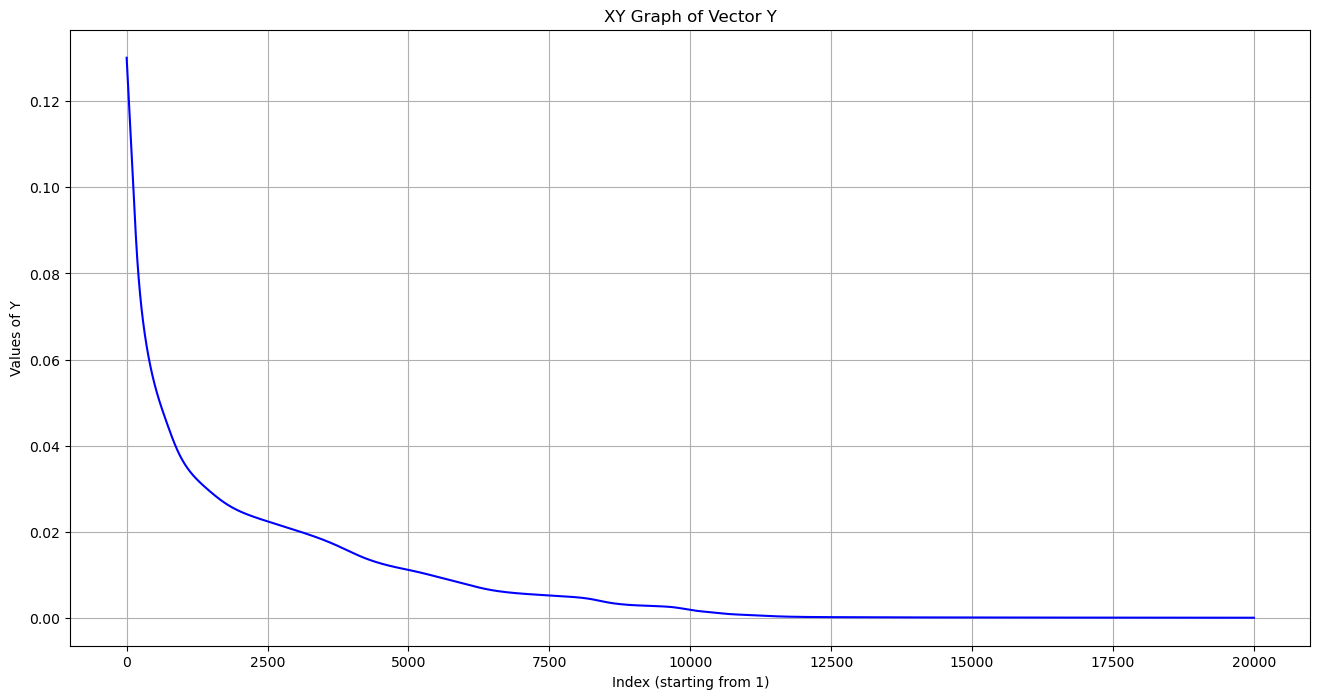

In [7]:
directory = '20240507_N16_myPC_simulation/'
name_models = ['Clements_Arct']

lastLoss_tuples = extract_all_loss(directory)

y = lastLoss_tuples[0][1]
print(y)
x = np.arange(1, len(y) + 1)



plt.figure(figsize=(16, 8))  # You can specify the size of the figure
plt.plot(x, y, linestyle='-', color='b')  # Line plot with blue color and circle markers

# Adding title and labels
plt.title('XY Graph of Vector Y')
plt.xlabel('Index (starting from 1)')
plt.ylabel('Values of Y')

# Show grid (optional)
plt.grid(True)

# Display the plot
plt.show();



